In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona
import pyproj

In [2]:
path = "../Geo Data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp"

In [3]:
world_data =  gpd.read_file(path)
world_data

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Admin-0 country,0,4,China,CH1,1,2,Country,1,Macao S.A.R,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2..."
254,Admin-0 country,6,5,Australia,AU1,1,2,Dependency,1,Ashmore and Cartier Islands,...,None,None,None,None,None,None,None,None,None,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
255,Admin-0 country,6,8,Bajo Nuevo Bank (Petrel Is.),BJN,0,2,Indeterminate,1,Bajo Nuevo Bank (Petrel Is.),...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."
256,Admin-0 country,6,5,Serranilla Bank,SER,0,2,Indeterminate,1,Serranilla Bank,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,"POLYGON ((-78.63707 15.86209, -78.64041 15.864..."


**Coordinate reference system**

In [4]:
world_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

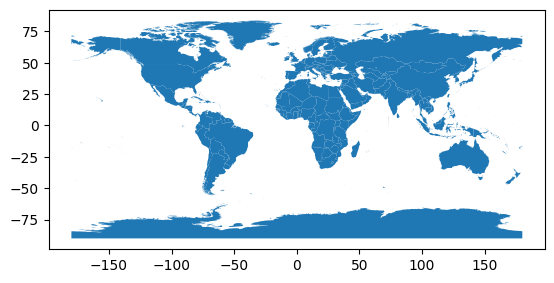

In [5]:
world_data.plot()

**Re-Projection to web mercator**

<Axes: >

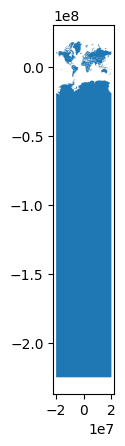

In [6]:
world_mercator = world_data.to_crs("EPSG:3857")
world_mercator.plot()

**Setting up figure size**

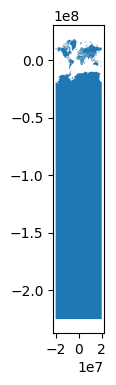

In [7]:
fig, ax = plt.subplots(figsize=(20,4), )
# fig.set_figwidth(20)
world_mercator.plot(ax=ax)
ax.set_aspect('equal')
plt.show()

In [8]:
from shapely.geometry import box

In [9]:
crs = pyproj.CRS.from_epsg(3857)

In [10]:
crs.area_of_use

AreaOfUse(west=-180.0, south=-85.06, east=180.0, north=85.06, name='World between 85.06°S and 85.06°N.')

In [11]:
# bounds for area
crs.area_of_use.bounds

(-180.0, -85.06, 180.0, 85.06)

<Axes: >

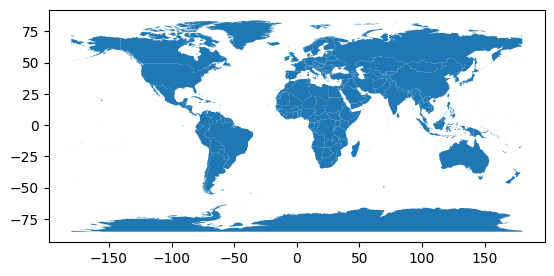

In [12]:
bounds = crs.area_of_use.bounds
clipped_data = gpd.clip(world_data, box(*bounds))
clipped_data.plot()

**Reprojecting clipped data to EPSG:3857**

<Axes: >

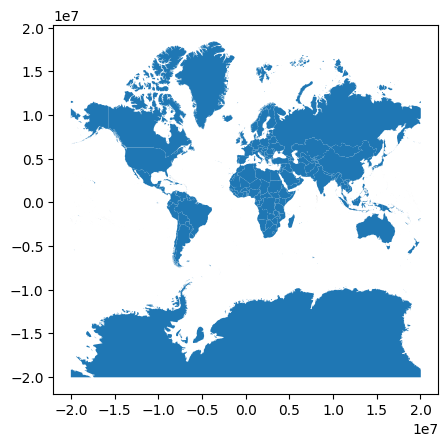

In [13]:
clipped_data.to_crs("EPSG:3857").plot()

### Creating a Customn Orthographic

#### 1. Fremont, seattle (self-Proclaimed Center of Universe)

**PROJ String:** `+proj=ortho +lat_0=47.6504 +lon_0=-122.3499 +datum=WGS84 +units=m +no_defs
`

In [14]:
fremont_proj_string = "+proj=ortho +lat_0=47.6504 +lon_0=-122.3499 +datum=WGS84 +units=m +no_defs"

**Reprojecting world_data to specified proj string**

In [15]:
fremont_centerd_world_crs =  world_data.crs.from_proj4(fremont_proj_string)
fremont_centerd_world_crs

<Projected CRS: +proj=ortho +lat_0=47.6504 +lon_0=-122.3499 +datum ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Orthographic
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

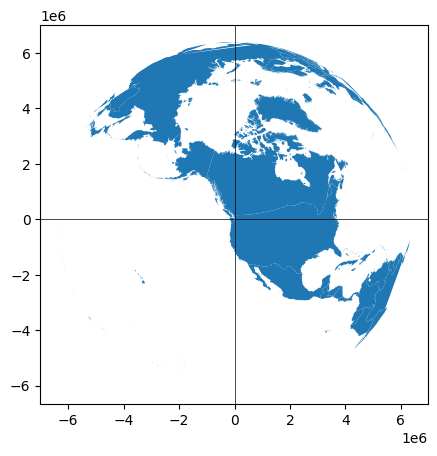

In [21]:
fig, ax = plt.subplots(figsize = (5, 5))
world_data.to_crs(fremont_centerd_world_crs).plot(ax = ax)

# adding center line
ax.axhline(y=0, color='black', lw=0.5)
ax.axvline(x=0, color="black", lw=0.5)

plt.show()

#### 2. Centering on India new delhi

**PROJ String:** `+proj=ortho +lat_0=28.6448 +lon_0=77.2167 +datum=WGS84 +units=m +no_defs`


In [22]:
india_proj_string = "+proj=ortho +lat_0=28.6448 +lon_0=77.2167 +datum=WGS84 +units=m +no_defs"

In [23]:
india_proj_crs = world_data.crs.from_proj4(india_proj_string)

In [24]:
india_proj_crs

<Projected CRS: +proj=ortho +lat_0=28.6448 +lon_0=77.2167 +datum=W ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Orthographic
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Plotting Projection centered arround New Delhi**

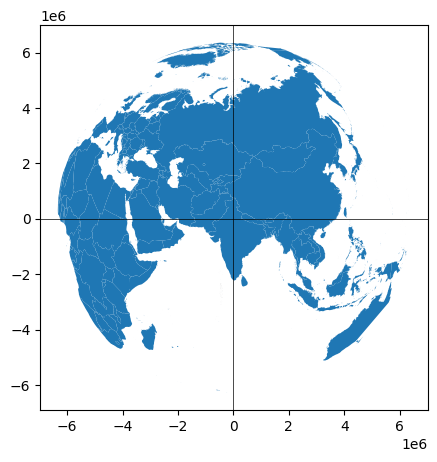

In [25]:
fig, ax = plt.subplots(figsize = (5, 5))
world_data.to_crs(india_proj_string).plot(ax = ax)

# adding center line
ax.axhline(y=0, color='black', lw=0.5)
ax.axvline(x=0, color="black", lw=0.5)

plt.show()

### Re-Projection Using EPSG Code

1. **Mount Everest (Nepal/China)**:
   - **EPSG:32645**: WGS 84 / UTM zone 45N
   - **Location**: Between 84°E and 90°E, northern hemisphere.

2. **Grand Canyon (USA)**:
   - **EPSG:32612**: WGS 84 / UTM zone 12N
   - **Location**: Between 114°W and 108°W, northern hemisphere.

3. **Amazon Rainforest (Brazil)**:
   - **EPSG:32721**: WGS 84 / UTM zone 21S
   - **Location**: Between 54°W and 48°W, southern hemisphere.

4. **Great Barrier Reef (Australia)**:
   - **EPSG:32755**: WGS 84 / UTM zone 55S
   - **Location**: Between 144°E and 150°E, southern hemisphere.

5. **Fremont, Seattle, WA (USA)**:
   - **EPSG:32610**: WGS 84 / UTM zone 10N
   - **Location**: Between 126°W and 120°W, northern hemisphere³.


In [43]:
epsg_mount_averest = "EPSG:32645"
epsg_grand_cnyon = "EPSG:32612"
epsg_amazon_rainforest = "EPSG:32721"
epsg_great_barrier = "EPSG:32755"
epsg_fremont_seattle = "EPSG:32610"
epsg_south_polar = "EPSG:3031"

epsgs = [epsg_mount_averest, epsg_grand_cnyon, epsg_amazon_rainforest, 
         epsg_great_barrier, epsg_fremont_seattle, epsg_south_polar]

In [46]:
def plot_epsg(epsgs):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

    for ax, epsg in zip(ax.flatten(), epsgs):
    
        world_data.to_crs(epsg).plot(ax = ax)
        
        # adding center line
        ax.axhline(y=0, color='black', lw=0.5)
        ax.axvline(x=0, color="black", lw=0.5)
    
    plt.show()

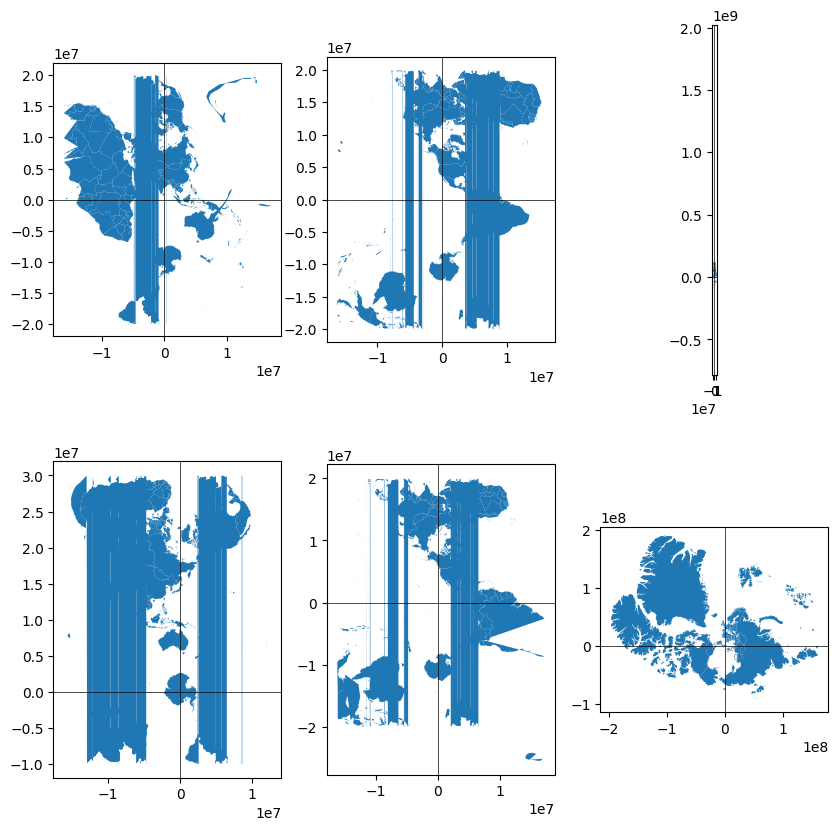

In [47]:
plot_epsg(epsgs)

In [49]:
epsg_codes = [
    # Mexico
    32613,  # WGS 84 / UTM zone 13N
    32614,  # WGS 84 / UTM zone 14N
    # 32615,  # WGS 84 / UTM zone 15N

    # Alaska
    32606,  # WGS 84 / UTM zone 6N
    32607,  # WGS 84 / UTM zone 7N
    # 32608,  # WGS 84 / UTM zone 8N

    # Greenland
    32622,  # WGS 84 / UTM zone 22N
    32623,  # WGS 84 / UTM zone 23N
    # 32624   # WGS 84 / UTM zone 24N
]


In [51]:
epsgs = map(lambda x : "EPSG:"+str(x), epsg_codes)

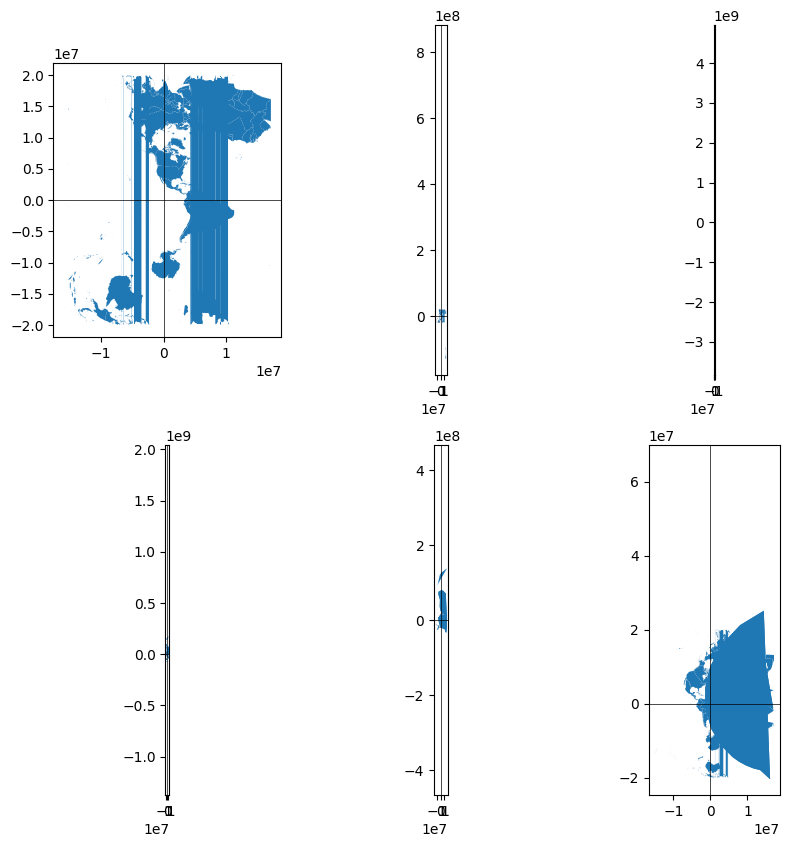

In [52]:
plot_epsg(epsgs)

**OK, something isn’t right with some of these maps**

Note some polygons (countries) cross the antimeridian (-180°/+180° lon) or one of the poles (+90° or -90° lat, like, say Antarctica). Or polygons could extend beyond the valid extent for the target projection. These polygons won’t render correctly.

If using a regional projection for local or regional analysis (e.g., UTM or state plane coordinate system), you probably don’t care about polygons from the other side of the planet anyway.

The solution is to isolate or clip polygons of interest before reprojecting.



**Isolate North American polygons**

Start with a quick inspection of the world GeoDataFrame

You should be able to use the standard Pandas “selection by label” approach (.loc) to isolate records for countries in North America

This can be done using a conditional statement, which will return a boolean array for selection

Store the output in a new GeoDataFrame

Regenerate the same plots (with your handy function!) using this new GeoDataFrame

In [67]:
for x in world_data.SOVEREIGNT.unique():
    if x.lower().find("america") > 0:
        print(x)

United States of America


In [69]:
filter =  world_data["SOVEREIGNT"] ==( world_data.SOVEREIGNT.str.find("america") > 0)

In [72]:
world_data[filter]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry


In [78]:
filter = (world_data.SOVEREIGNT.str.lower().str.find("america") > 0)

<Axes: >

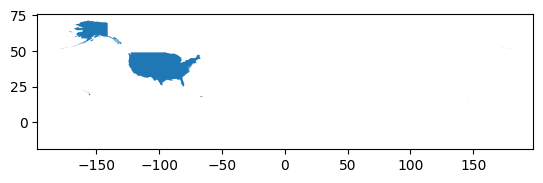

In [82]:
world_data[filter].plot()

In [90]:
world_datax =  world_data[["NAME","ADM0_A3","REGION_UN", "SUBREGION","ISO_A3",'geometry']]

In [92]:
world_datax.REGION_UN.unique()

array(['Asia', 'Americas', 'Africa', 'Europe', 'Oceania', 'Antarctica'],
      dtype=object)

In [101]:
world_datax.set_index('REGION_UN', inplace=True)
world_datax

,NAME,ADM0_A3,SUBREGION,ISO_A3,geometry
REGION_UN,,,,,
Asia,Indonesia,IDN,South-Eastern Asia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
Asia,Malaysia,MYS,South-Eastern Asia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
Americas,Chile,CHL,South America,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
Americas,Bolivia,BOL,South America,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
Americas,Peru,PER,South America,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
...,...,...,...,...,...
Asia,Macao,MAC,Eastern Asia,MAC,"MULTIPOLYGON (((113.5586 22.16303, 113.56943 2..."
Oceania,Ashmore and Cartier Is.,ATC,Australia and New Zealand,-99,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4..."
Americas,Bajo Nuevo Bank,BJN,Caribbean,-99,"POLYGON ((-79.98929 15.79495, -79.98782 15.796..."


In [103]:
world_datax.loc["Americas"]

,NAME,ADM0_A3,SUBREGION,ISO_A3,geometry
REGION_UN,,,,,
Americas,Chile,CHL,South America,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
Americas,Bolivia,BOL,South America,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
Americas,Peru,PER,South America,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."
Americas,Argentina,ARG,South America,ARG,"MULTIPOLYGON (((-67.1939 -22.82222, -67.14269 ..."
Americas,Suriname,SUR,South America,SUR,"POLYGON ((-54.0808 3.30931, -54.11429 3.28538,..."
Americas,Guyana,GUY,South America,GUY,"MULTIPOLYGON (((-56.48182 1.94161, -56.52851 1..."
Americas,Costa Rica,CRI,Central America,CRI,"MULTIPOLYGON (((-83.6965 10.93659, -83.68687 1..."
Americas,Nicaragua,NIC,Central America,NIC,"MULTIPOLYGON (((-85.70174 11.08088, -85.70242 ..."
Americas,St-Martin,MAF,Caribbean,MAF,"POLYGON ((-63.01757 18.03339, -63.08589 18.058..."


### Plotting Whole Americas Region

In [120]:
americas = world_datax.loc["Americas"]

<Axes: >

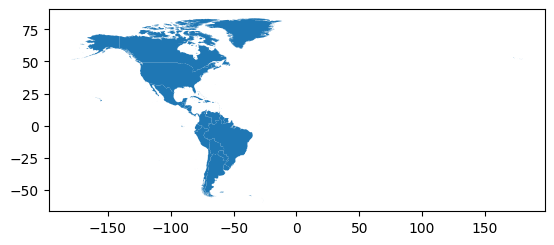

In [121]:
americas.plot()

**limiting the range**

In [136]:
americas[americas.bounds.maxx < 0]

array([-141.00556393,  -59.47275156,  -11.37682044,   83.63410065])

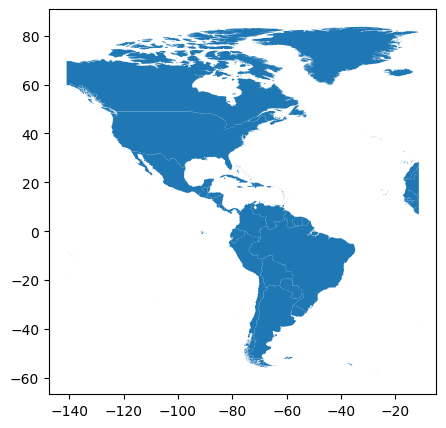

In [150]:

ax = gpd.clip(world_datax, americas[americas.bounds.maxx < 0].total_bounds
             ).to_crs("EPSG:4326").plot(figsize=(5,9))
ax.set_aspect(aspect = 0.9)

**Now we wll extract only north american region**

In [152]:
north_merica_filter = americas["SUBREGION"] == "Northern America"

(np.float64(-179.1435033839999),
 np.float64(0.0),
 np.float64(18.906117143000074),
 np.float64(93.63410065300008))

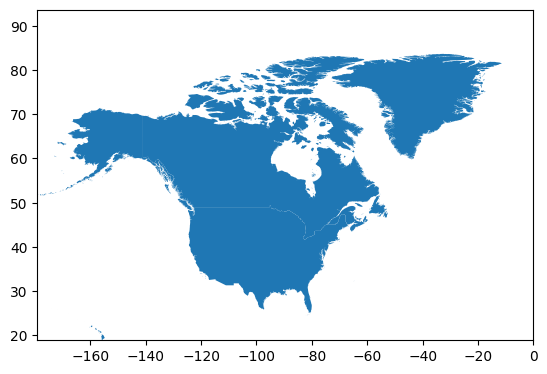

In [159]:
ax = americas[north_merica_filter].plot()
xmin, ymin, xmax, ymax = americas[north_merica_filter].total_bounds
ax.axis((xmin, 0, ymin, ymax+10))

In [160]:
north_america = americas[north_merica_filter]

In [161]:
north_america

,NAME,ADM0_A3,SUBREGION,ISO_A3,geometry
REGION_UN,,,,,
Americas,United States of America,USA,Northern America,USA,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
Americas,Canada,CAN,Northern America,CAN,"MULTIPOLYGON (((-95.16057 49.36949, -95.16034 ..."
Americas,Greenland,GRL,Northern America,GRL,"MULTIPOLYGON (((-40.8758 65.0965, -40.85367 65..."
Americas,St. Pierre and Miquelon,SPM,Northern America,SPM,"MULTIPOLYGON (((-56.15095 46.79365, -56.15648 ..."
Americas,Bermuda,BMU,Northern America,BMU,"MULTIPOLYGON (((-64.6761 32.38866, -64.64763 3..."


In [162]:
print(epsgs)

In [163]:
def plot_epsg(epsgs, world):
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,10))

    for ax, epsg in zip(ax.flatten(), epsgs):
    
        world.to_crs(epsg).plot(ax = ax)
        
        # adding center line
        ax.axhline(y=0, color='black', lw=0.5)
        ax.axvline(x=0, color="black", lw=0.5)
    
    plt.show()

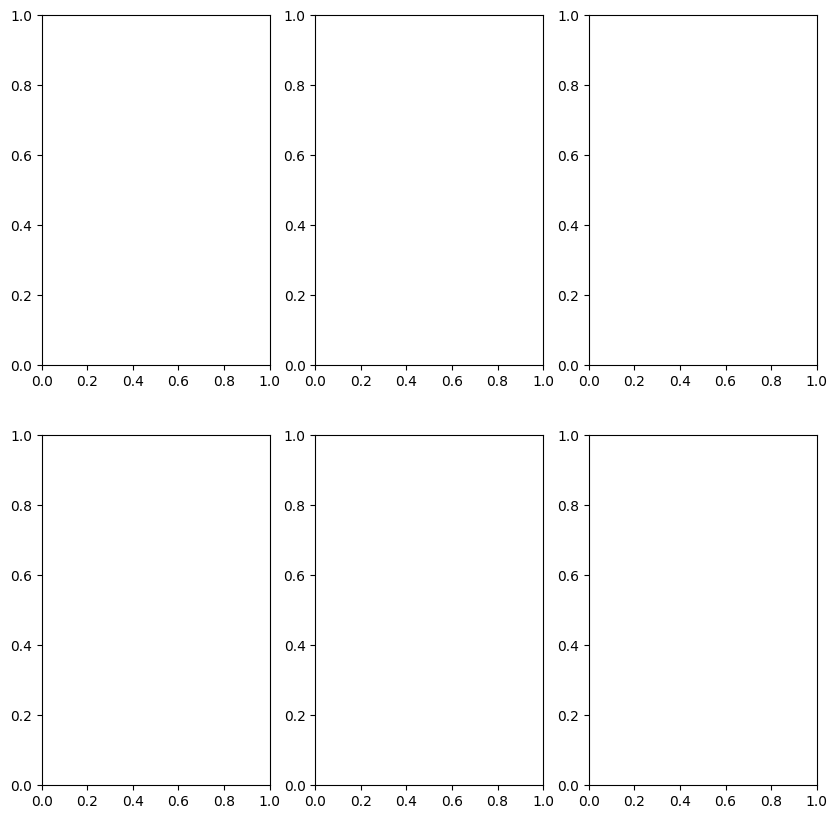

In [165]:
plot_epsg(epsgs, north_america)

<Axes: >

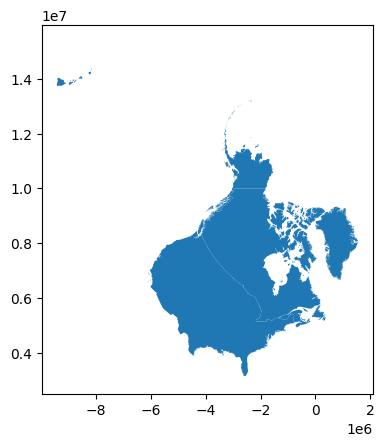

In [171]:
north_america.to_crs(epsg=32622).plot()

In [176]:
bounds =  pyproj.CRS.from_epsg(32622).area_of_use.bounds
bounds

(-54.0, 0.0, -48.0, 84.0)

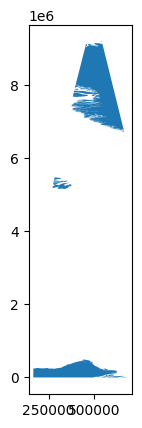

In [205]:
ax= gpd.clip(americas, box(*bounds)).to_crs("EPSG:32622").plot()
ax.set_aspect(aspect = 0.2)

**Plotting above bounding box on americas region**

In [188]:
bbox = box(*pyproj.CRS.from_epsg(32622).area_of_use.bounds)

In [190]:
greenland_box_gdf = gpd.GeoDataFrame({"geometry":[bbox]}, crs=americas.crs)

<Axes: >

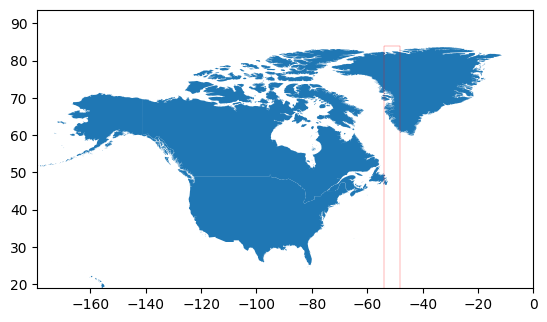

In [204]:
ax = americas[north_merica_filter].plot()
xmin, ymin, xmax, ymax = americas[north_merica_filter].total_bounds
ax.axis((xmin, 0, ymin, ymax+10))
greenland_box_gdf.plot(ax=ax, lw=0.2,edgecolor='red', facecolor="#fff0")

<Axes: >

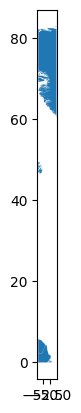

In [210]:
gpd.clip(world_datax, box(*bounds)).to_crs("EPSG:4326").plot()

In [214]:
print(box(*bounds).centroid)

POINT (-51 42)
